In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [32]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [69]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [70]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [71]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


No Data is missing

# EDA

In [6]:
df.shape

(4177, 9)

In [37]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# We have 4177 rows and 9 columns in dataset and no missing values as well.

In [7]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# We have float type and object type value in our independent variables(there are 8 independent variables) and rings is our target variable(1 dependent variable).

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# No missing values in our dataset

In [11]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

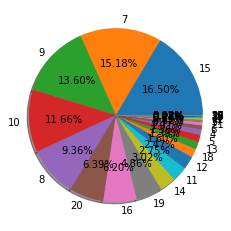

In [13]:
labels = '15', '7', '9', '10', '8', '20', '16', '19', '14', '11', '12', '18', '13', '5', '4', '6', '21', '17', '22', '1', '3', '26', '23', '29', '2', '27', '25', '24'
    
fig, ax = plt.subplots()
ax.pie(df['Rings'].value_counts(),labels=labels, autopct='%1.2f%%', shadow=True)

plt.show()

Pie Chart for class variable

the above Pie chats helps us to understand about each class variable present in our target variable.

In [72]:
df = df.drop(df.columns[[0]], axis=1)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


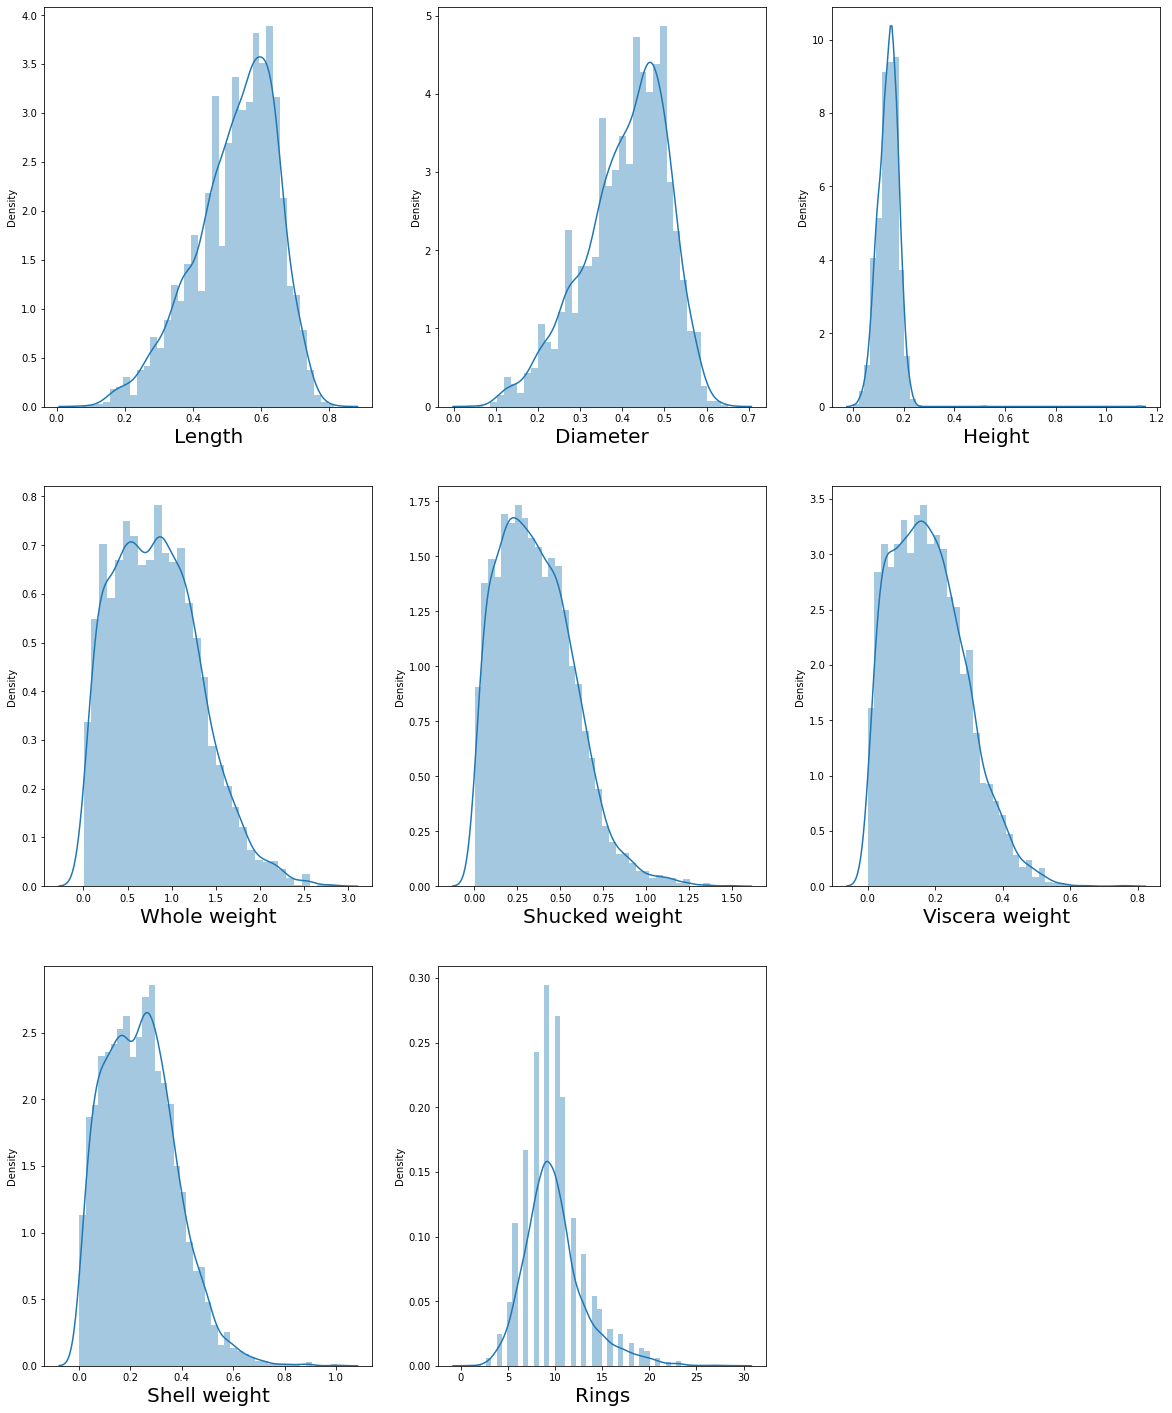

In [73]:
#Lets see how the data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1


for column in df:
    if plotnumber<=8: # asthere are 8 columns in the dataset.
        ax = plt.subplot(3,3, plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    
    plotnumber+=1
plt.show()

In [74]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


from the above table we get the count,mean,std,min,max of our target variable.

# Univariate analysis

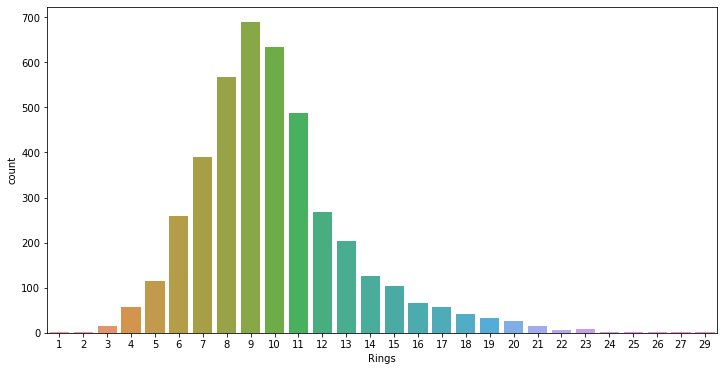

In [75]:
plt.figure(figsize=(12,6))
sn.countplot(df['Rings'])
plt.show()

# here the classes are not equally distributed, there is a class imbalance issue.

To check distribution plot

# Bi variate analysis

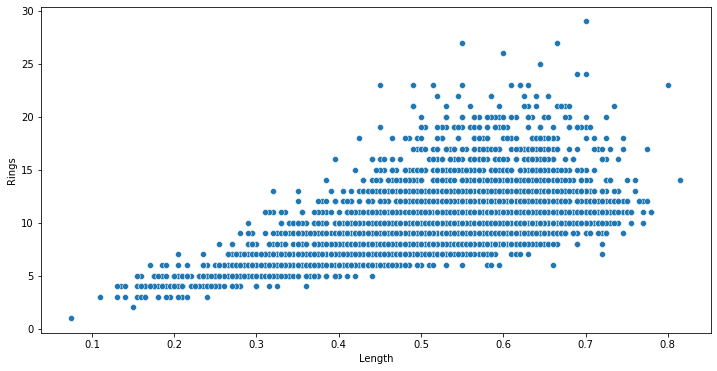

In [76]:
#comparison between rings and sex, scatter plot
plt.figure(figsize=(12,6))
sn.scatterplot(x ='Length', y ='Rings', data = df, palette = "inferno")
plt.show()

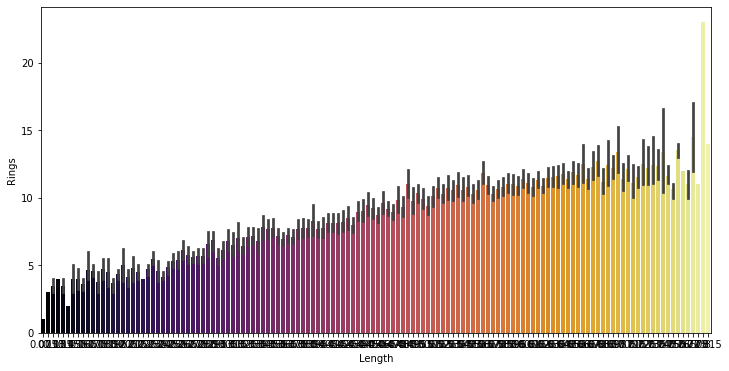

In [77]:
#comparison between rings and Length, bar plot
plt.figure(figsize=(12,6))
sn.barplot(x ='Length', y ='Rings', data = df, palette = "inferno")
plt.show()

In [95]:
#Sex	Length	Diameter	Height	Whole weight	Shucked weight	Viscera weight	Shell weight	Rings

# Multi-variate analysis

<Figure size 864x432 with 0 Axes>

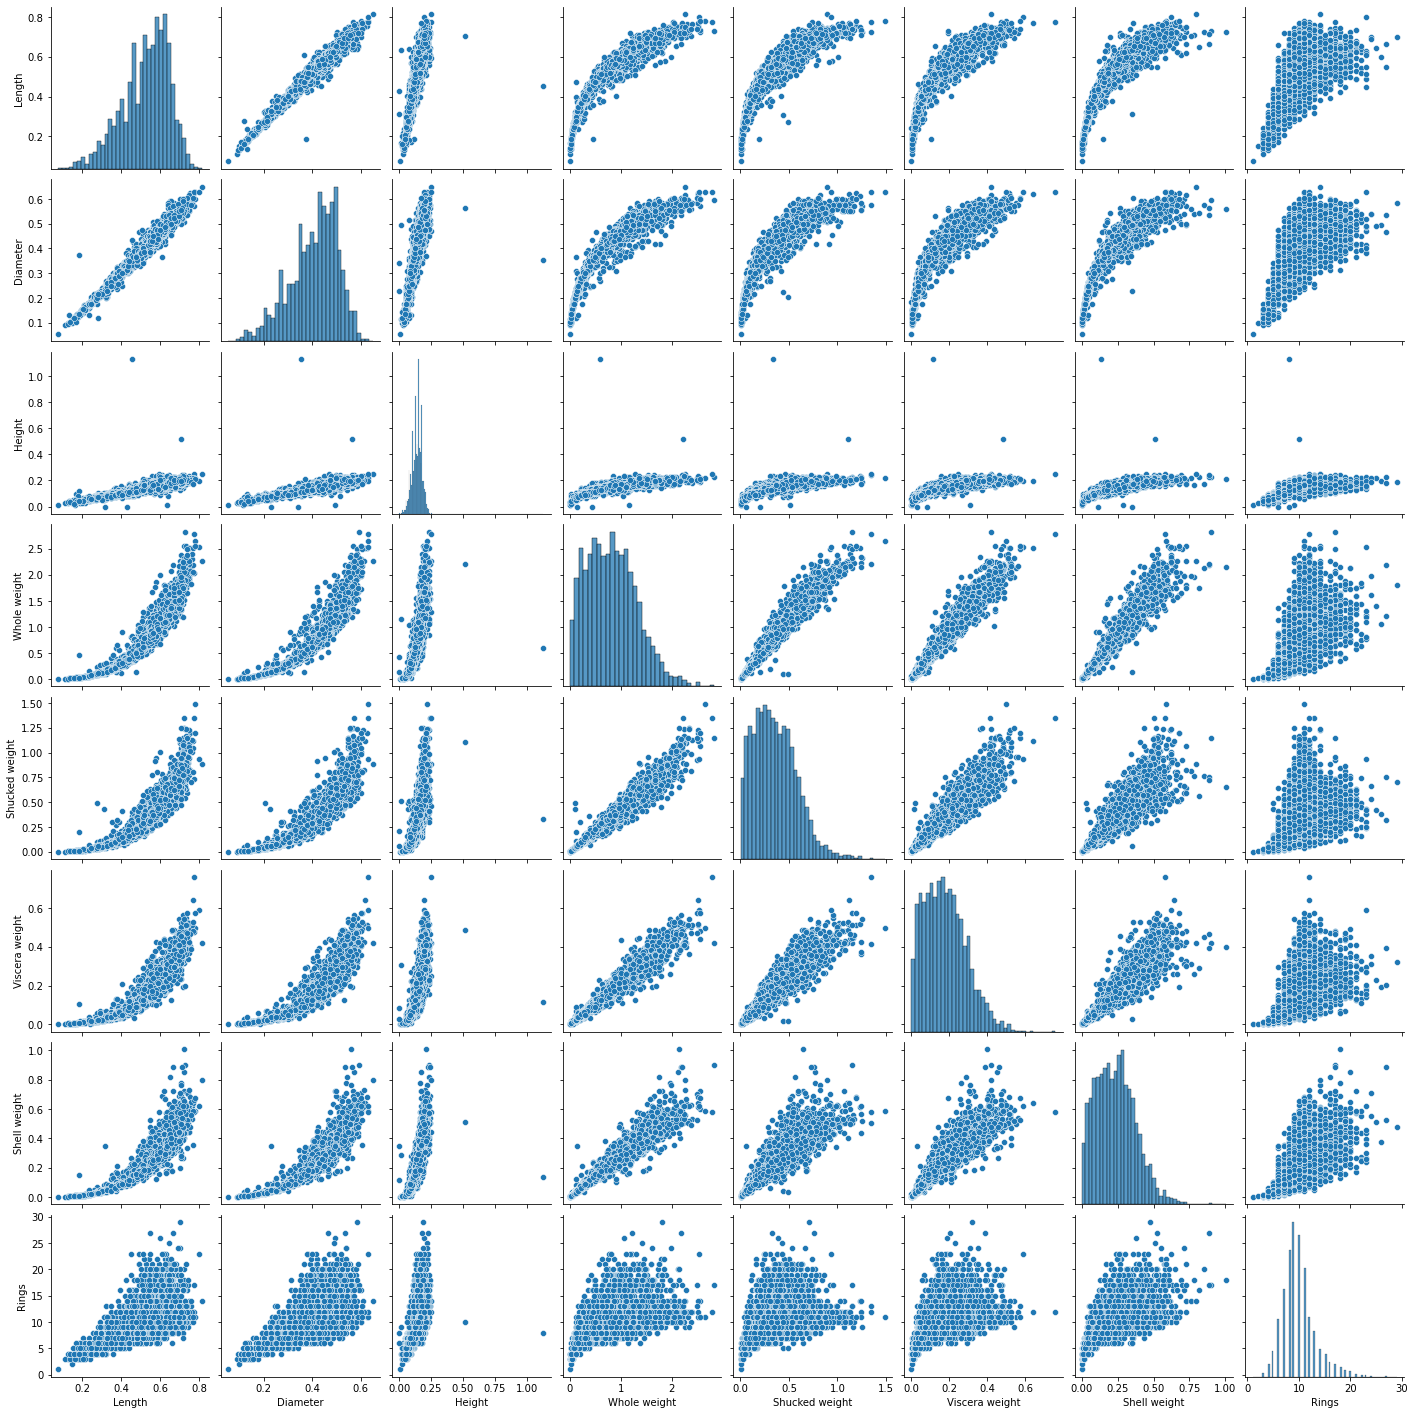

In [78]:
plt.figure(figsize=(12,6))
sn.pairplot(df)
plt.show()

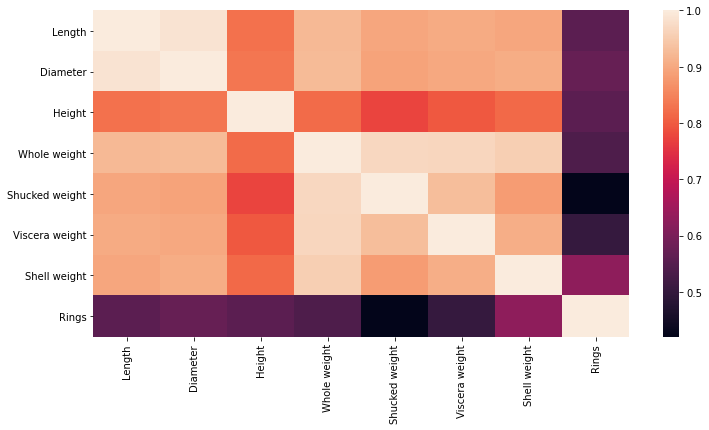

In [79]:
plt.figure(figsize=(12,6))
sn.heatmap(df.corr())
plt.show()

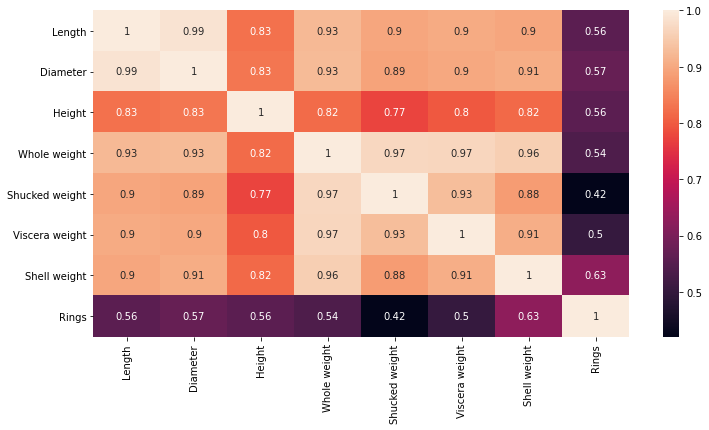

In [80]:
plt.figure(figsize=(12,6))
sn.heatmap(df.corr(), annot = True)
plt.show()

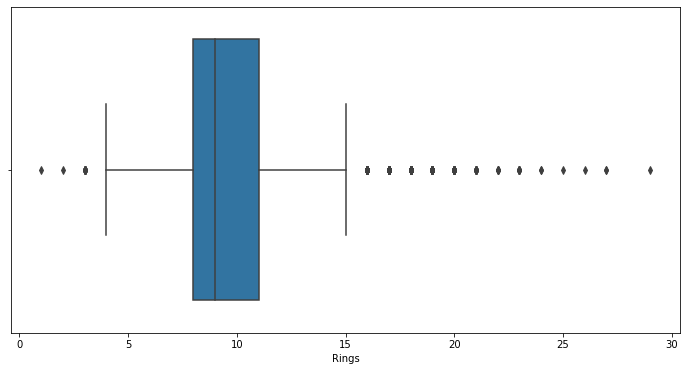

In [81]:
plt.figure(figsize=(12,6))
sn.boxplot(df["Rings"])
plt.show()

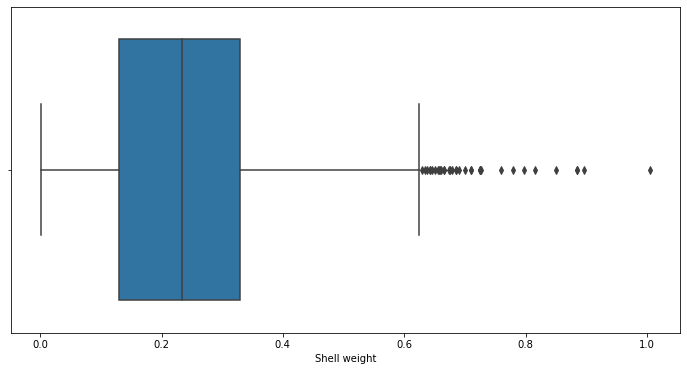

In [82]:
plt.figure(figsize=(12,6))
sn.boxplot(df["Shell weight"])
plt.show()

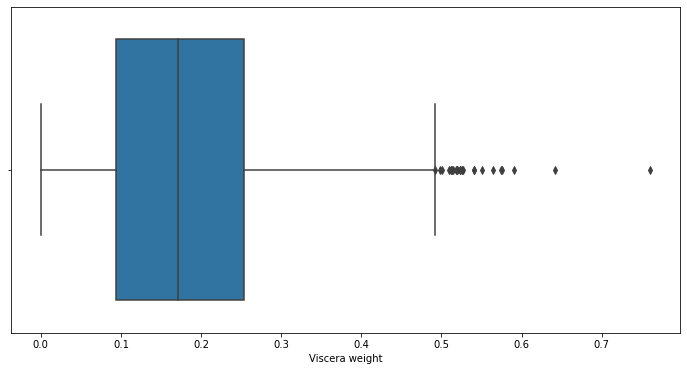

In [83]:
plt.figure(figsize=(12,6))
sn.boxplot(df["Viscera weight"])
plt.show()

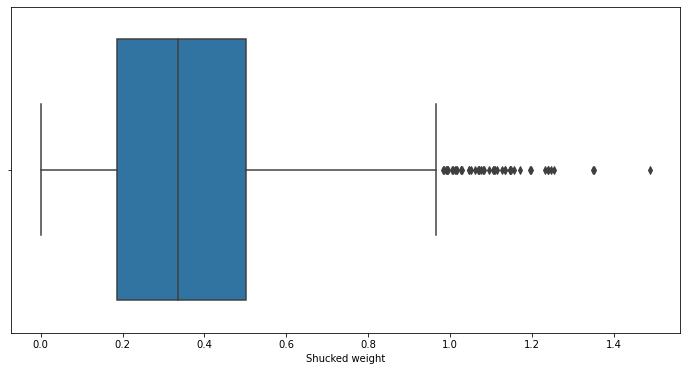

In [84]:
plt.figure(figsize=(12,6))
sn.boxplot(df["Shucked weight"])
plt.show()

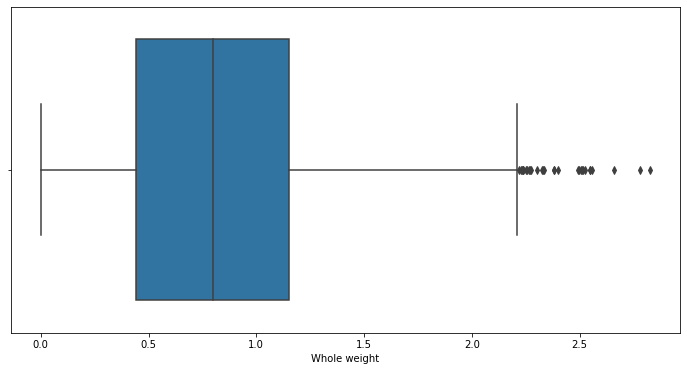

In [85]:
plt.figure(figsize=(12,6))
sn.boxplot(df["Whole weight"])
plt.show()

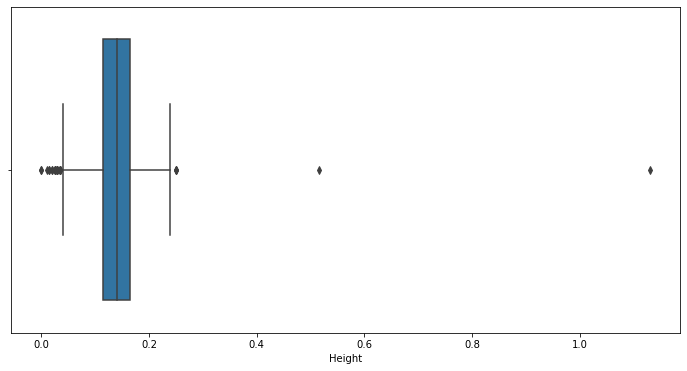

In [86]:
plt.figure(figsize=(12,6))
sn.boxplot(df["Height"])
plt.show()

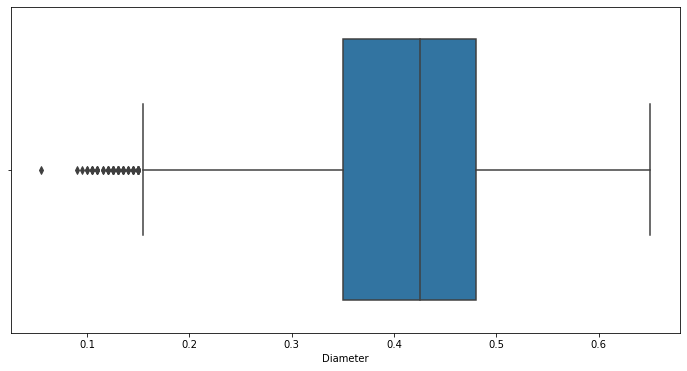

In [87]:
plt.figure(figsize=(12,6))
sn.boxplot(df["Diameter"])
plt.show()

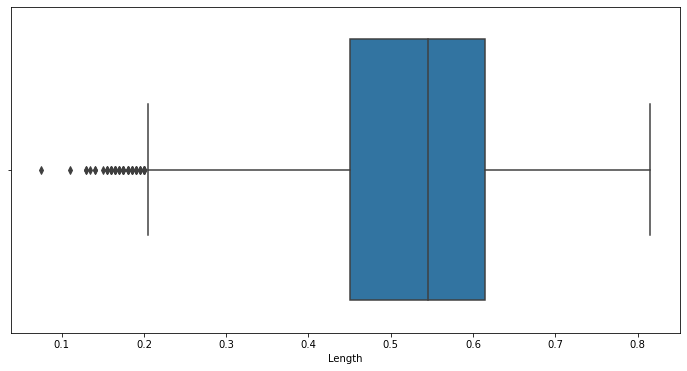

In [88]:
plt.figure(figsize=(12,6))
sn.boxplot(df["Length"])
plt.show()

# from the above boxplot, we can observe that we have outliers.

# To check skewness

In [89]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

# we can see that the length and diameter have negative values with the skewness at the left and the rest of the features have the skewness on the right side.

In [92]:
from scipy.stats import zscore

z=np.abs(zscore(df))

new_df=df [(z<3).all(axis=1) ]

In [93]:
new_df.shape

(4027, 8)

# After removing outliers we lost 150 rows

In [94]:
df.shape

(4177, 8)

before removing we had 4177 rows and 8 columns

# to calculate percentage 150/4177 = 3.5%

# the data loss is less than 10%, so it is completely fine.

In [97]:
x=new_df.drop("Rings",axis=1)
y=new_df["Rings"]

In [98]:
x.value_counts()

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  Shell weight
0.760   0.605     0.215   2.1730        0.8010          0.4915          0.6460          1
0.480   0.375     0.145   0.7770        0.2160          0.1300          0.1700          1
        0.395     0.150   0.6815        0.2145          0.1405          0.2495          1
        0.390     0.150   0.6275        0.2760          0.1340          0.1850          1
                  0.145   0.5825        0.2315          0.1210          0.2550          1
                                                                                       ..
0.585   0.465     0.170   0.9915        0.3865          0.2240          0.2650          1
                  0.165   0.9355        0.4035          0.2275          0.2590          1
                          0.8850        0.4025          0.1625          0.2740          1
                  0.160   0.9555        0.4595          0.2360          0.2650          1
0.165   0.115  

In [99]:
y.value_counts()

9     686
10    625
8     566
11    472
7     391
6     258
12    251
13    199
14    119
5     113
15    102
16     62
17     53
4      49
18     39
19     32
3      10
Name: Rings, dtype: int64

# Data Preprocessing

In [117]:
from sklearn.preprocessing import StandardScaler

stdscale = StandardScaler().fit(x_train)
x_train_std = stdscale.transform(x_train)
x_train_std = stdscale.transform(x_test)

In [ ]:
# we are now scaling the values down

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [102]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRs=0
for i in range(1,200):
   x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30,random_state =i)
   mod = DecisionTreeClassifier()
   mod.fit(x_train, y_train)
   pred = mod.predict(x_test)
   mod.fit(x_train, y_train)
   pred = mod.predict(x_test)
   acc=accuracy_score(y_test, pred)
   if acc>maxAccu:
       maxAxxu=acc
       maxRS=i
print("Best accuracy is ",maxAccu," on Random_state",maxRS)

Best accuracy is  0  on Random_state 199


In [103]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.30, random_state =maxRS)

In [128]:
y_train

3423    11
2182    13
2467    16
4115    10
2643     8
        ..
1988     5
2220     8
3494     9
2535    11
3627    10
Name: Rings, Length: 2818, dtype: int64

In [115]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(x_train, y_train)

LinearRegression()

In [125]:
linreg.score(x_train, y_train)

0.5139690514066251

In [126]:
linreg.score(x_test, y_test)

0.5128461469874741

In [137]:
y_test = linreg.predict(x_test)

In [130]:
y_pred = linreg.predict(x_test)

In [131]:
r2_score(y_test,y_pred)

0.5128461469874741

In [132]:
print(f"regression : R2:{model.score(x_test, y_test)}")

regression : R2:0.5113488691786786


# model is giving upto 51% accuracy

In [174]:
# Test RMSE
linreg_pred = linreg.predict(x_test)
test_rmse = mean_squared_error(y_test, linreg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

# Validation RMSE
linreg_pred_val = linreg.predict(x_val)
val_remse = mean_squared_error(y_val, lin_reg_pred, squared=False)
print(f'Validation RMSE: {val_rmse}')

Test RMSE: 0.0


NameError: name 'x_val' is not defined

In [171]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [173]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = [1,0,0,1,0,0,1,0,0,1]
# predicted values
predicted = [1,0,0,1,0,0,0,1,0,0]

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[2 2]
 [1 5]]
Outcome values : 
 2 2 1 5
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           0       0.71      0.83      0.77         6

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10



# Hyperparameter tuning

In [180]:
from sklearn.model_selection import GridSearchCV

In [187]:
>>> import numpy as np
>>> from sklearn.linear_model import LinearRegression
>>> X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
>>> # y = 1 * x_0 + 2 * x_1 + 3
>>> y = np.dot(X, np.array([1, 2])) + 3
>>> reg = LinearRegression().fit(X, y)
>>> reg.score(X, y)
1.0
>>> reg.coef_
array([1., 2.])
>>> reg.intercept_
3.0
>>> reg.predict(np.array([[3, 5]]))
array([16.])

NameError: name 'array' is not defined

In [181]:

...
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
1
2
3
4
5
6
7
...
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

# Saving the model

In [ ]:

import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

# Loading the model

In [ ]:
mod=joblib.load("FinalModel.pkl")

In [ ]:
print(mod.predict(x_test))